In [2]:
import matplotlib.pyplot as plt
import sys
from math import sin, cos, pi
import numpy as np
from numpy.linalg import inv

def G(y,t, m1, l1): 
	a1d, a2d = y[0], y[1]
	a1, a2 = y[2], y[3]

	m11, m12 = (m1+m2)*l1, m2*l2*cos(a1-a2)
	m21, m22 = l1*cos(a1-a2), l2
	m = np.array([[m11, m12],[m21, m22]])

	f1 = -m2*l2*a2d*a2d*sin(a1-a2) - (m1+m2)*g*sin(a1)
	f2 = l1*a1d*a1d*sin(a1-a2) - g*sin(a2)
	f = np.array([f1, f2])

	accel = inv(m).dot(f)

	return np.array([accel[0], accel[1], a1d, a2d])

def RK4_step(y, t, dt, m1, l1):
	k1 = G(y,t, m1, l1) # len(m) x 4
	k2 = G(y+0.5*k1*dt, t+0.5*dt, m1, l1)
	k3 = G(y+0.5*k2*dt, t+0.5*dt, m1, l1)
	k4 = G(y+k3*dt, t+dt, m1, l1)

	return dt * (k1 + 2*k2 + 2*k3 + k4) /6

def update(a1, a2):
	scale = 100
	x1 = l1*scale * sin(a1) #+ offset[0]
	y1 = l1*scale * cos(a1) #+ offset[1]
	x2 = x1 + l2*scale * sin(a2)
	y2 = y1 + l2*scale * cos(a2)

	return (x1, y1), (x2, y2)

# parameters

#massen
m1_values = np.arange(1,10,1)
m1 = 1.0
m2 = 1.0

#längen
l1_values = np.arange(1,10,1)
l1 = 1.0
l2 = 1.0

a1, a2 = pi/4, -1.0
g = 9.81

#prev_point = None
t = 0.0
delta_t = 0.02

In [ ]:
def time_evolution(t_stop,m1,l1):

    y = np.array([0.0, 0.0, 1.0, 0.0])

    t=0

    t_simulation = np.array([])
    y_simulation = np.array([])

    while t<t_stop:

        t_simulation = np.append(t_simulation,t)
        y_simulation = np.append(y_simulation,y)

        t += delta_t
        y = y + RK4_step(y,t,delta_t,m1,l1)

    y_simulation = y_simulation.reshape(len(t_simulation),4)

    return y_simulation

y_simulation = time_evolution(5,m1,l1)
t_simulation = np.arange(0,5+delta_t,delta_t)


In [6]:
#winkel masse 1
winkel1 = y_simulation.reshape(len(t_simulation),4)[:,2] 

#winkel masse 2
winkel2 = y_simulation.reshape(len(t_simulation),4)[:,3]

In [7]:
def update(a1, a2):

	x1 = l1* sin(a1)
	y1 = l1 * cos(a1)
	x2 = x1 + l2 * sin(a2)
	y2 = y1 + l2 * cos(a2)

	return (x1, y1), (x2, y2)


positions = [update(winkel1[i],winkel2[i]) for i in range(len(t_simulation))]

positions[0][1]

(0.8414709848078965, 1.5403023058681398)

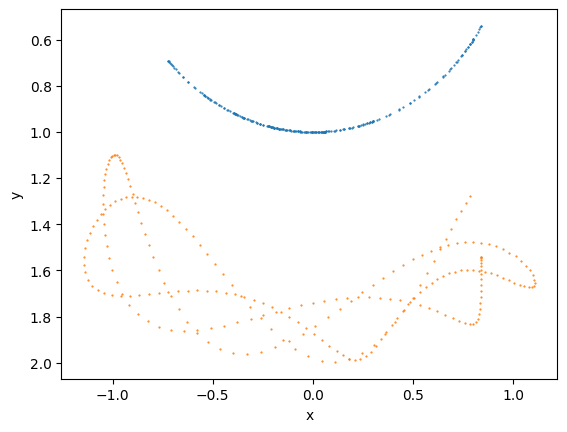

In [34]:
x_positions_masse1 = [positions[i][0][0] for i in range(len(t_simulation))]
y_positions_masse1 = [positions[i][0][1] for i in range(len(t_simulation))]

x_positions_masse2 = [positions[i][1][0] for i in range(len(t_simulation))]
y_positions_masse2 = [positions[i][1][1] for i in range(len(t_simulation))]

plt.scatter(x_positions_masse1,y_positions_masse1,s=0.3)
plt.scatter(x_positions_masse2,y_positions_masse2, s=0.3)

plt.xlabel('x')
plt.ylabel('y')

plt.gca().invert_yaxis()  # Y-Achse umdrehen

In [35]:
#sample masses and lengths from a gaussian distribution

# mean 1
# standarddeviation

# Anzahl der Samples
num_samples = 1000

# gauss distributed values of log(m2/m1)
log_mass_ratio = np.random.normal(loc=0, scale=2, size=num_samples)
log_length_ratio = np.random.normal(loc=0, scale=2, size=num_samples)

m1_values = np.exp(-log_mass_ratio)
l1_values = np.exp(-log_length_ratio)

m1_values

array([1.74960201e-01, 8.58719623e+00, 9.91835216e+00, 3.59435605e+00,
       1.85267491e+00, 3.03462968e+00, 6.66209464e-01, 8.07125317e-01,
       5.33826813e-01, 8.54635771e-01, 2.38558953e-01, 2.45877636e+00,
       2.34849228e-03, 1.75342157e-02, 8.88314365e+00, 5.36983454e-02,
       1.27561857e-01, 5.21411826e+00, 1.28163016e+00, 1.50913676e+01,
       2.24309455e-03, 3.40803122e-01, 1.89093972e-01, 1.05255108e+00,
       2.67093573e+00, 1.19636524e-01, 9.12022555e-01, 1.13873822e-01,
       1.26603540e+02, 3.90629248e+00, 2.31092335e-02, 1.97855691e+00,
       5.06592320e-01, 1.03428571e-01, 1.18907628e+00, 1.58706189e+00,
       2.47054756e+00, 1.07894953e+02, 1.54101064e+00, 2.98236141e+00,
       5.59576705e-01, 2.86402595e-02, 1.72125680e-01, 8.72828100e-01,
       3.84577606e+00, 2.94748085e-01, 3.73103209e+00, 1.92649634e+01,
       4.77108960e+01, 2.11083948e-02, 4.83993180e-02, 1.18000589e+01,
       1.30242011e+00, 1.62400566e+00, 7.04436810e+00, 9.21036560e-01,
      

(0.0, 100.0)

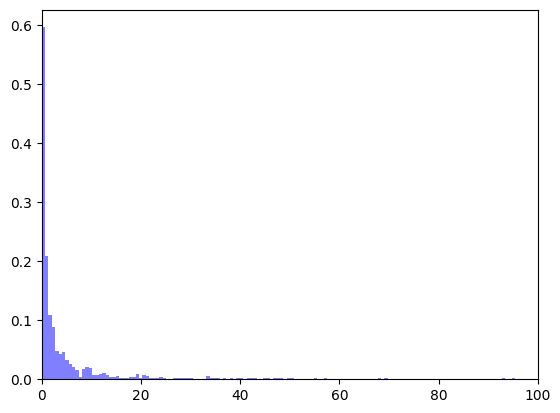

In [40]:
plt.hist(np.exp(log_mass_ratio), bins=1000, density=True, alpha=0.5, color='b')
plt.xlim(0,100)

In [12]:
#m1_values = np.arange(1,10,0.1)
print('N_m', len(m1_values))
#l1_values = np.arange(1,10,1)
print('N_l', len(l1_values))

array = [[time_evolution(0.1,m1,l1) for m1 in m1_values] for l1 in l1_values]


print(len(array)) # len(array) = len(m1)
print(len(array[0]))
print(len(array[0][0]))
print(len(array[0][0][0]))

#array hat die dimension len(m) x len(l) x len(time) x 4


N_m 10
N_l 10
10
10
5
4


In [13]:
## umwandeln der verschachtelten liste in einen torch tensor

import torch

# Angenommen, du hast Listen für Massen und Längen
masses = m1_values  # Beispielhafte Massenwerte
lengths = l1_values  # Beispielhafte Längenwerte

mass_count = len(masses)
length_count = len(lengths)
time_steps = len(array[0][0])  # Anzahl der Zeitschritte

# Leeren Tensor für die Trajektorien erstellen
trajectories = torch.zeros((length_count, mass_count, time_steps, 4))

# Liste in Tensor konvertieren
for length_idx in range(length_count):
    for mass_idx in range(mass_count):
        trajectories[length_idx, mass_idx] = torch.tensor(array[length_idx][mass_idx], dtype=torch.float32)


print(trajectories.shape)  # Sollte (length_count, mass_count, t, 4) sein


torch.Size([10, 10, 5, 4])


In [14]:
import torch
import torchvision 
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import types
import time

# === Daten vorbereiten ===
# Beispiel: Der Tensor hat die Form (masscount, lengthcount, t, 4)
# Wir formen ihn um zu (batch, t, 4), wobei batch = masscount * lengthcount
print(trajectories.shape)
lengthcount, masscount, t, features = trajectories.shape
trajectories = trajectories.reshape(masscount * lengthcount, t, features)  # (batch, t, 4)

# Labels sind die Massen und Längen für jede Trajektorie
# Korrekte Umwandlung in Tensoren
masses = torch.tensor(m1_values, dtype=torch.float32)
lengths = torch.tensor(l1_values, dtype=torch.float32)
labels = torch.stack((masses, lengths), dim=1)  # Shape (batch, 2)


torch.Size([10, 10, 5, 4])


In [ ]:
'''
import torch
print(torch.__version__)

import torchvision
print(torchvision.__version__)
'''

2.2.2
0.17.2


In [16]:
# In ein Dataset packen
class PendulumDataset(torch.utils.data.Dataset):
    def __init__(self, inputs, targets):
        self.inputs = inputs
        self.targets = targets

    def __len__(self):
        return len(self.inputs)

    def __getitem__(self, idx):
        return self.inputs[idx], self.targets[idx]

dataset = PendulumDataset(trajectories, labels)
train_loader = torch.utils.data.DataLoader(dataset, batch_size=256, shuffle=True)


In [17]:
# === ResNet-Modell für Sequenzen (Conv1D) ===
class ResNet1D(nn.Module):
    
    def __init__(self, num_classes=2):
        super().__init__()
        self.resnet = models.resnet18(weights=None)

        # Conv1D für Zeitserien
        self.resnet.conv1 = nn.Conv1d(4, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.resnet.avgpool = nn.Identity()
        self.resnet.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = x.permute(0, 2, 1)  # (batch, t, 4) → (batch, 4, t) für Conv1D
        x = self.resnet(x)
        return x

In [18]:
# Modell initialisieren
device = "cuda" if torch.cuda.is_available() else "cpu"
model = ResNet1D().to(device)

# Loss und Optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# === Training und Testing ===
def train(args, model, device, train_loader, optimizer, epoch, loss_fn):
    model.train()
    start_time = time.time()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

        if batch_idx % args.log_interval == 0:
            print(f'Train Epoch: {epoch} [{batch_idx * len(data)}/{len(train_loader.dataset)}] '
                  f'({100. * batch_idx / len(train_loader):.0f}%)\tLoss: {loss.item():.6f}')
    print(f"--- Epoch time: {time.time() - start_time:.2f} seconds ---")

In [19]:
# Hyperparameter
num_epochs = 20
args = types.SimpleNamespace(dry_run=False, log_interval=16)

# Training Loop
for epoch in range(num_epochs):
    train(args, model, device, train_loader, optimizer, epoch, loss_fn)

IndexError: index 67 is out of bounds for dimension 0 with size 10

In [11]:
#sample masses from a gaussian distribution

# mean 1
# standarddeviation

# Anzahl der Samples
num_samples = 1000

# gauss distributed values of log(m2/m1)
log_mass_ratio = np.random.normal(loc=0, scale=1, size=num_samples)

m1 = np.exp(-log_mass_ratio)

m2 = np.ones(num_samples)

m1

array([1.76864655e+00, 1.74842647e+00, 2.42576462e+00, 2.97860190e+00,
       4.41049220e+00, 1.48522382e+00, 1.13597762e+00, 2.09827963e+00,
       7.92500118e-01, 6.02249400e-01, 3.45755988e-01, 2.34030290e-01,
       6.40139253e-01, 2.19434488e+00, 2.87387204e+00, 2.88278120e+00,
       1.15945530e-01, 2.18313941e+00, 1.12191859e+00, 1.80860707e+00,
       7.54632529e-01, 1.14416099e+00, 1.62743269e+00, 2.08089628e+00,
       1.07514033e+00, 1.05729390e+01, 2.44248615e-01, 1.06645681e+01,
       6.25692721e-01, 1.51805990e+00, 9.12206173e-01, 4.09136888e-01,
       1.64573875e+00, 6.17876589e-01, 1.29220399e+00, 6.92621119e-01,
       1.67616358e+00, 3.73403206e+00, 6.17392238e+00, 3.59824641e+00,
       5.24659024e-01, 5.19550447e-01, 1.35688418e+00, 2.37260796e-01,
       9.19720924e-01, 1.55622434e+00, 1.06835551e+00, 1.61633272e+00,
       9.76129690e-01, 2.65281798e+00, 2.41828657e-01, 3.93115326e+00,
       4.68215746e-01, 3.36187193e+00, 3.28925339e+00, 7.17204417e-01,
      

(array([0.42598175, 0.6643752 , 0.5549487 , 0.45724646, 0.33609569,
        0.1836802 , 0.23057728, 0.15241549, 0.11724268, 0.11724268,
        0.09379415, 0.07816179, 0.08597797, 0.05862134, 0.03908089,
        0.03126472, 0.04689707, 0.02344854, 0.01563236, 0.01563236,
        0.01563236, 0.01172427, 0.01563236, 0.00781618, 0.02344854,
        0.00390809, 0.01172427, 0.00781618, 0.01172427, 0.00390809,
        0.00390809, 0.        , 0.00390809, 0.00781618, 0.00390809,
        0.        , 0.00390809, 0.00390809, 0.        , 0.00390809,
        0.        , 0.        , 0.        , 0.        , 0.00390809,
        0.00390809, 0.00781618, 0.00390809, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00390809, 0.00390809, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00390809, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

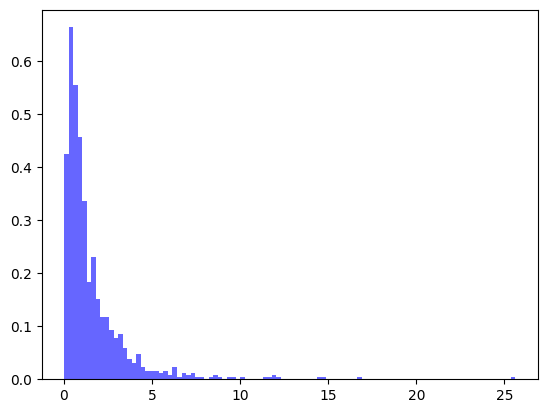

In [13]:
plt.hist(np.exp(log_mass_ratio), bins=100, density=True, alpha=0.6, color='b')